In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [4]:
cols_to_drop = ['contact', 'pdays','month','duration','previous']
df.drop(cols_to_drop, axis=1, inplace=True)

In [5]:
df.head()

,age,job,marital,education,balance,housing,loan,day,campaign,deposit
0,59,admin.,married,secondary,2343,yes,no,5,1,yes
1,56,admin.,married,secondary,45,no,no,5,1,yes
2,41,technician,married,secondary,1270,yes,no,5,1,yes
3,55,services,married,secondary,2476,yes,no,5,1,yes
4,54,admin.,married,tertiary,184,no,no,5,2,yes


In [6]:
dtypes =df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes,"Num_Uniqe":n_uniq}).T

,age,job,marital,education,balance,housing,loan,day,campaign,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,int64,object
Num_Uniqe,76,12,3,4,3805,2,2,31,36,2


In [7]:
null = df.isnull().sum()
ratio = null/df.shape[0]
pd.DataFrame({"Null_sum":null, "Ratio":ratio}).T

,age,job,marital,education,balance,housing,loan,day,campaign,deposit
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
num_cols =  df.select_dtypes("number").columns
num_cols

Index(['age', 'balance', 'day', 'campaign'], dtype='object')

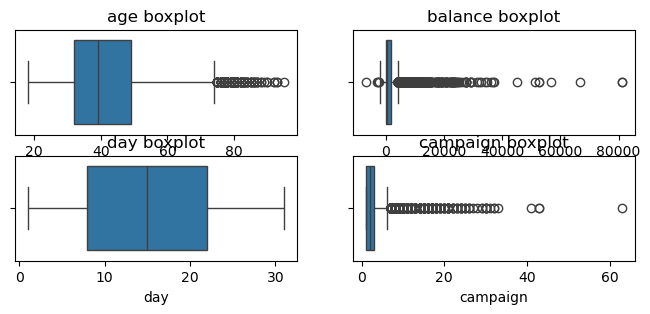

In [9]:
num_cols =  df.select_dtypes(include="number").columns
plt.figure(figsize=(8,3))
for i, col in enumerate(num_cols):
  plt.subplot(2,2, i+1)
  sns.boxplot(df[col], orient="h")
  plt.title(f"{col} boxplot")

plt.show()

In [10]:
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1
  Lower_Fence = Q1 - 1.5* IQR
  Upper_Fence =Q3 + 1.5*IQR

  Lower_Outliers = df[df[col]< Lower_Fence][col].values
  Upper_Outliers =df[df[col]> Upper_Fence][col].values

  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
  df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

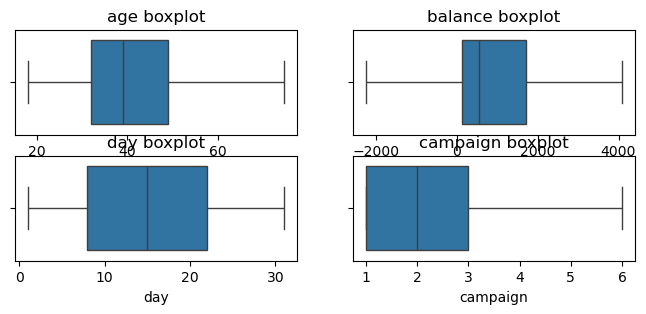

In [11]:
num_cols =  df.select_dtypes(include="number").columns
plt.figure(figsize=(8,3))
for i, col in enumerate(num_cols):
  plt.subplot(2,2, i+1)
  sns.boxplot(df[col], orient="h")
  plt.title(f"{col} boxplot")

plt.show()

In [12]:
df.duplicated().sum()

68

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
cat_cols = ['job',  'marital',  'education',  'housing', 'loan',  'deposit']
df[cat_cols]= df[cat_cols].astype('category')

In [16]:
cat_cols =  df.select_dtypes(include="category").columns
cat_cols


Index(['job', 'marital', 'education', 'housing', 'loan', 'deposit'], dtype='object')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,702,1236,205,165,1261,261,218,553,91,983,155,36
yes,624,700,123,108,1286,506,182,367,264,834,200,34


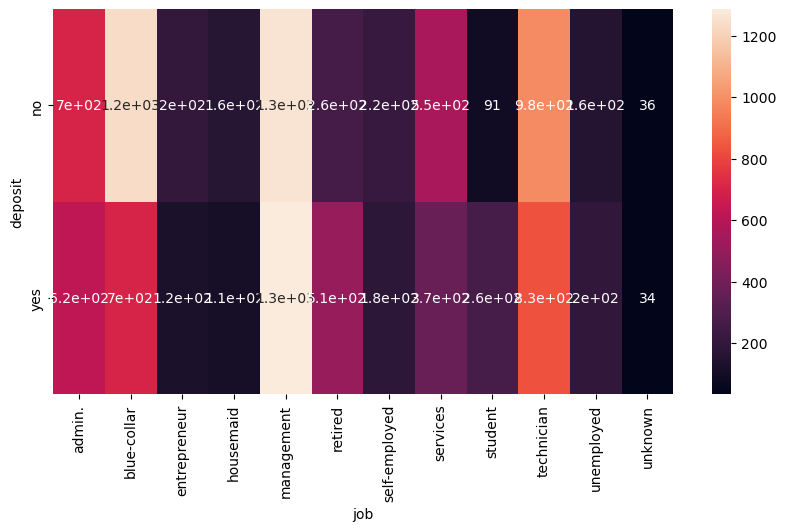

marital,divorced,married,single
deposit,,,
no,671,3593,1602
yes,617,2716,1895


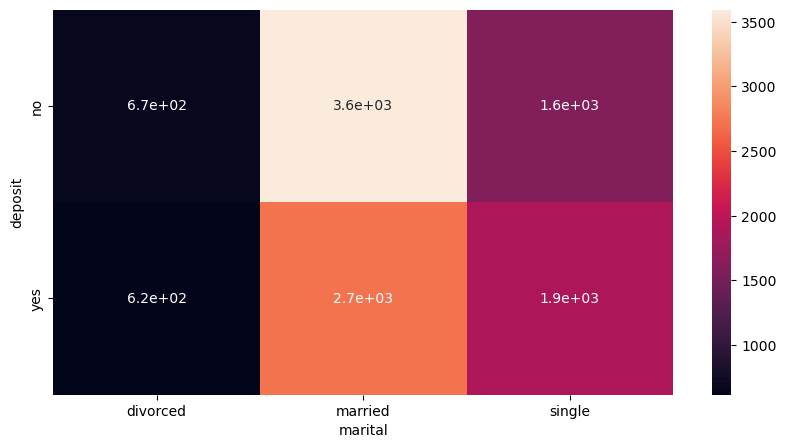

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3023,1689,245
yes,583,2427,1972,246


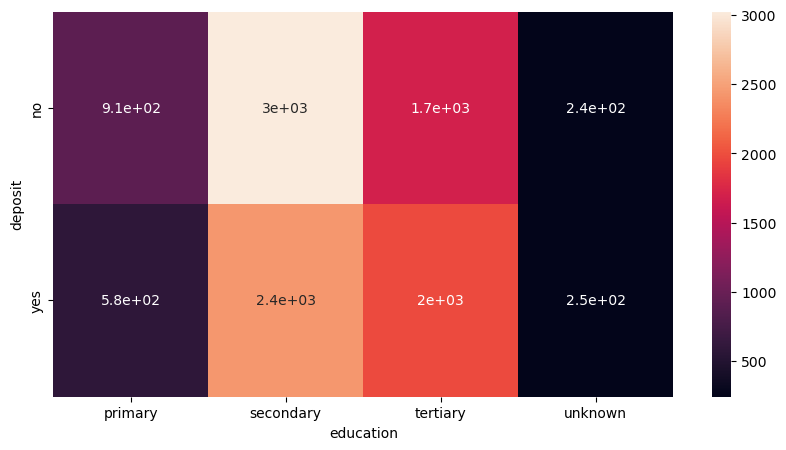

housing,no,yes
deposit,,
no,2522,3344
yes,3306,1922


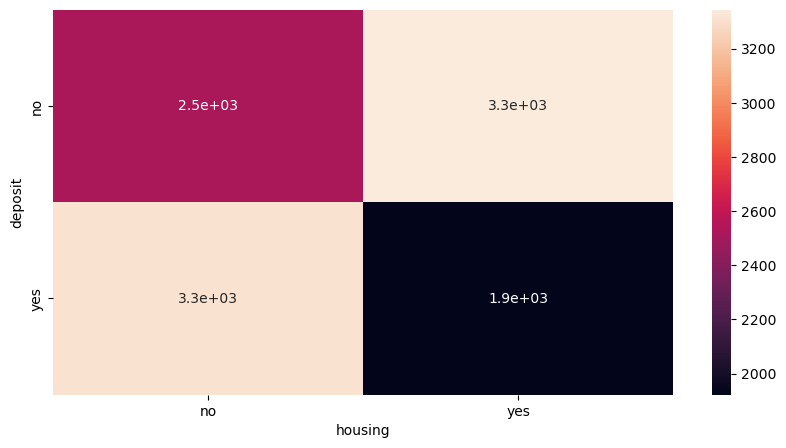

loan,no,yes
deposit,,
no,4890,976
yes,4744,484


<Axes: xlabel='loan', ylabel='deposit'>

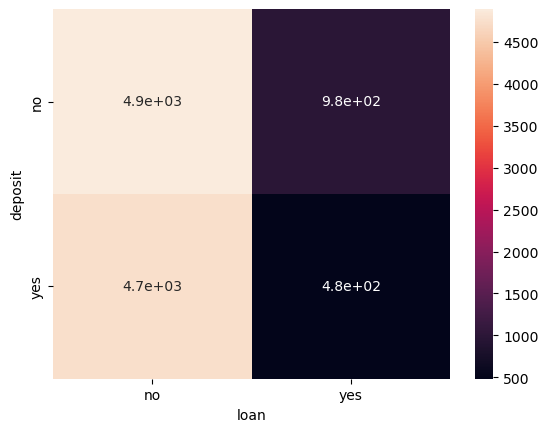

In [17]:
for col in cat_cols[:-2]:
  agg =df.pivot_table(index = 'deposit', columns=col, aggfunc=len, values="loan")
  plt.figure(figsize=(10,5))
  display(agg)
  sns.heatmap(agg, annot=True)
  plt.show()
agg = df.pivot_table(index = 'deposit',  columns='loan', aggfunc=len, values="marital")
display(agg)
sns.heatmap(agg, annot=True)

In [18]:
x  = df.drop("deposit", axis = 1)
y =df[['deposit']]

In [19]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [20]:
encode_cols = ['job',  'marital',  'education',  'housing', 'loan',  'deposit']


In [21]:
oridinal_cols = ['marital',  'education',  'housing', 'loan']
binary_cols = ['job']

In [22]:
for col in cat_cols:
  print(f"\n Column:{col}")
  print(df[col].value_counts())


 Column:job
management       2547
blue-collar      1936
technician       1817
admin.           1326
services          920
retired           767
self-employed     400
student           355
unemployed        355
entrepreneur      328
housemaid         273
unknown            70
Name: job, dtype: int64

 Column:marital
married     6309
single      3497
divorced    1288
Name: marital, dtype: int64

 Column:education
secondary    5450
tertiary     3661
primary      1492
unknown       491
Name: education, dtype: int64

 Column:housing
no     5828
yes    5266
Name: housing, dtype: int64

 Column:loan
no     9634
yes    1460
Name: loan, dtype: int64

 Column:deposit
no     5866
yes    5228
Name: deposit, dtype: int64


In [23]:
labels = {
          'education': {'unknown': 0, 'primary': 1, 'tertiary': 2, 'secondary':3},
          'marital': {'single': 0, 'divorced': 1, 'married': 2},
          'housing': {'no': 0, 'yes': 1},
          'loan': {'no': 0, 'yes': 1}
         }

In [24]:
for col in oridinal_cols:
  x[col] = x[col].map(labels[col])

In [25]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols = binary_cols)
x =binary_encoder.fit_transform(x)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y['deposit'] = label_encoder.fit_transform(y['deposit'])

In [27]:
x

,age,job_0,job_1,job_2,job_3,marital,education,balance,housing,loan,day,campaign
0,0.725664,0,0,0,1,2,3,0.725095,1,0,0.133333,0.0
1,0.672566,0,0,0,1,2,3,0.362863,0,0,0.133333,0.0
2,0.407080,0,0,1,0,2,3,0.555958,1,0,0.133333,0.0
3,0.654867,0,0,1,1,2,3,0.746059,1,0,0.133333,0.0
4,0.637168,0,0,0,1,2,2,0.384773,0,0,0.133333,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.265487,0,1,1,0,0,1,0.355927,1,0,0.633333,0.0
11158,0.371681,0,0,1,1,2,3,0.471311,0,0,0.500000,0.6
11159,0.247788,0,0,1,0,0,3,0.360340,0,0,0.600000,0.2
11160,0.442478,0,0,1,0,2,3,0.355769,0,1,0.233333,0.2


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state = 0)

In [30]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [31]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(x_train,y_train)
y_pred_LR = LR_clf.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
print("confusion_matrix", confusion_matrix(y_test,y_pred_LR))
print("accuracy_score", accuracy_score(y_test,y_pred_LR))
print("recall_score", recall_score(y_test,y_pred_LR))
print("precision_score", precision_score(y_test,y_pred_LR))
print("f1_score", f1_score(y_test,y_pred_LR))

confusion_matrix [[836 368]
 [436 579]]
accuracy_score 0.6376746282109058
recall_score 0.5704433497536946
precision_score 0.6114044350580782
f1_score 0.5902140672782875


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(x_train,y_train)
y_pred_knn = knn_clf.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
print("confusion_matrix", confusion_matrix(y_test,y_pred_knn))
print("accuracy_score", accuracy_score(y_test,y_pred_knn))
print("recall_score", recall_score(y_test,y_pred_knn))
print("precision_score", precision_score(y_test,y_pred_knn))
print("f1_score", f1_score(y_test,y_pred_knn))

confusion_matrix [[815 389]
 [439 576]]
accuracy_score 0.6268589454709329
recall_score 0.5674876847290641
precision_score 0.5968911917098445
f1_score 0.5818181818181818


In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_dt.fit(x_train,y_train)
y_pred_dt = clf_dt.predict(x_test)



In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
print("confusion_matrix", confusion_matrix(y_test,y_pred_dt))
print("accuracy_score", accuracy_score(y_test,y_pred_dt))
print("recall_score", recall_score(y_test,y_pred_dt))
print("precision_score", precision_score(y_test,y_pred_dt))
print("f1_score", f1_score(y_test,y_pred_dt))

confusion_matrix [[713 491]
 [458 557]]
accuracy_score 0.5723298783235692
recall_score 0.548768472906404
precision_score 0.5314885496183206
f1_score 0.5399903053805138


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_dt_entropy.fit(x_train,y_train)
y_pred_entro = clf_dt_entropy.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
print("confusion_matrix", confusion_matrix(y_test,y_pred_entro))
print("accuracy_score", accuracy_score(y_test,y_pred_entro))
print("recall_score", recall_score(y_test,y_pred_entro))
print("precision_score", precision_score(y_test,y_pred_entro))
print("f1_score", f1_score(y_test,y_pred_entro))

confusion_matrix [[740 464]
 [448 567]]
accuracy_score 0.5890040558810274
recall_score 0.5586206896551724
precision_score 0.5499515033947624
f1_score 0.5542521994134897
